# Does home advantage play a role in a team's performance?

### Importing Libraries
---------------------------


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#Loading data
df = pd.read_pickle('Major_International_Results.pkl')
wc = df[df['tournament'] == 'FIFA World Cup']
df.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,False
1,1873-03-08,England,Scotland,4,2,Friendly,False
2,1874-03-07,Scotland,England,2,1,Friendly,False
3,1875-03-06,England,Scotland,2,2,Friendly,False
4,1876-03-04,Scotland,England,3,0,Friendly,False


# => Made Columns for Home Wins, Away Wins and Draws
- Neutral columns was made to be equal to False so that

In [52]:
# Made a new DataFrame in which neutral = False
# Going to Use this to add new Columns and do EDA

newDF = df[df['neutral'] == False]
newDF = newDF[newDF['tournament'].isin(['Copa América','FIFA World Cup','African Cup of Nations','UEFA Euro'])]

In [53]:
# Columns are added, taking into account only the matches where neutral == False

newDF["home_winner"] = newDF.home_score > newDF.away_score
newDF["home_loser"] = newDF.home_score < newDF.away_score
newDF["draw"] = newDF.home_score == newDF.away_score

# Replaced all values of the columns made with 1s and 0s to easily differentiate between them and plot them
newDF[['home_winner','home_loser','draw']]= newDF[['home_winner','home_loser','draw']].replace(True, 1)
newDF[['home_winner','home_loser','draw']]= newDF[['home_winner','home_loser','draw']].replace(False, 0)

# Changed Data types to Int for efficient plotting and comparisions
newDF.home_winner = newDF.home_winner.astype(int)
newDF.home_loser = newDF.home_loser.astype(int)
newDF.draw = newDF.draw.astype(int)

# For Checking Winners
newDF.home_winner[newDF.home_winner == 1] = newDF.home_team
newDF.home_loser[newDF.home_loser == 1] = newDF.home_team

# In Case of a Draw
newDF.home_winner[newDF.home_score == newDF.away_score] = "Draw"
newDF.home_loser[newDF.home_score == newDF.away_score] = "Draw"

# For Checking Losers
newDF.home_winner[newDF.home_winner == 0] = newDF.away_team
newDF.home_loser[newDF.home_loser == 0] = newDF.away_team

newDF.rename(columns={'home_winner':'winners',"home_loser":"losers"}, inplace=True)

newDF['neutral_win'] = newDF['winners'] == newDF['home_team']
newDF['neutral_win'] = newDF['neutral_win'].replace(True,1)
newDF['neutral_win'] = newDF['neutral_win'].replace(False,0)
newDF['neutral_win'] = newDF['neutral_win'].astype(int)

newDF.head(10)

/home/ediot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ediot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ediot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ediot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: Settin

,date,home_team,away_team,home_score,away_score,tournament,neutral,winners,losers,draw,neutral_win
430,1916-07-06,Argentina,Chile,6,1,Copa América,False,Argentina,Chile,0,1
432,1916-07-10,Argentina,Brazil,1,1,Copa América,False,Draw,Draw,1,0
436,1916-07-17,Argentina,Uruguay,0,0,Copa América,False,Draw,Draw,1,0
461,1917-09-30,Uruguay,Chile,4,0,Copa América,False,Uruguay,Chile,0,1
466,1917-10-07,Uruguay,Brazil,4,0,Copa América,False,Uruguay,Brazil,0,1
469,1917-10-14,Uruguay,Argentina,1,0,Copa América,False,Uruguay,Argentina,0,1
493,1919-05-11,Brazil,Chile,6,0,Copa América,False,Brazil,Chile,0,1
498,1919-05-18,Brazil,Argentina,3,1,Copa América,False,Brazil,Argentina,0,1
502,1919-05-26,Brazil,Uruguay,2,2,Copa América,False,Draw,Draw,1,0
503,1919-05-29,Brazil,Uruguay,1,0,Copa América,False,Brazil,Uruguay,0,1


In [54]:
neutral_li = []
for x in newDF['home_team'].iteritems():
    if (x[1] not in neutral_li) :
        neutral_li.append(x[1])

In [55]:
not_neutral = df[df['neutral'] == True]
not_neutral[not_neutral['home_team'].isin(neutral_li) | not_neutral['away_team'].isin(neutral_li)]
not_neutral.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral
262,1910-05-29,Chile,Uruguay,0,3,Friendly,True
326,1912-07-03,Norway,Russia,2,1,Friendly,True
428,1916-07-02,Chile,Uruguay,0,4,Copa América,True
431,1916-07-08,Brazil,Chile,1,1,Copa América,True
434,1916-07-12,Brazil,Uruguay,1,2,Copa América,True


In [56]:
# Columns are added, taking into account only the matches where neutral == False

not_neutral["winner"] = not_neutral.home_score > not_neutral.away_score
not_neutral["loser"] = not_neutral.home_score < not_neutral.away_score
not_neutral["draw"] = not_neutral.home_score == not_neutral.away_score

# Replaced all values of the columns made with 1s and 0s to easily differentiate between them and plot them
not_neutral[['winner','loser','draw']]= not_neutral[['winner','loser','draw']].replace(True, 1)
not_neutral[['winner','loser','draw']]= not_neutral[['winner','loser','draw']].replace(False, 0)

# Changed Data types to Int for efficient plotting and comparisions
not_neutral.winner = not_neutral.winner.astype(int)
not_neutral.loser = not_neutral.loser.astype(int)
not_neutral.draw = not_neutral.draw.astype(int)

# For Checking Winners
not_neutral.winner[not_neutral.winner == 1] = not_neutral.home_team
not_neutral.loser[not_neutral.loser == 1] = not_neutral.home_team

# In Case of a Draw
not_neutral.winner[not_neutral.home_score == not_neutral.away_score] = "Draw"
not_neutral.loser[not_neutral.home_score == not_neutral.away_score] = "Draw"

# For Checking Losers
not_neutral.winner[not_neutral.winner == 0] = not_neutral.away_team
not_neutral.loser[not_neutral.loser == 0] = not_neutral.away_team


not_neutral['neutral_win'] = not_neutral['winner'].isin(neutral_li)
not_neutral['neutral_win'] = not_neutral['neutral_win'].replace(True,1)
not_neutral['neutral_win'] = not_neutral['neutral_win'].replace(False,0)
not_neutral['neutral_win'] = not_neutral['neutral_win'].astype(int)

not_neutral.head(10)

/home/ediot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ediot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/ediot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,date,home_team,away_team,home_score,away_score,tournament,neutral,winner,loser,draw,neutral_win
262,1910-05-29,Chile,Uruguay,0,3,Friendly,True,Uruguay,Chile,0,1
326,1912-07-03,Norway,Russia,2,1,Friendly,True,Norway,Russia,0,0
428,1916-07-02,Chile,Uruguay,0,4,Copa América,True,Uruguay,Chile,0,1
431,1916-07-08,Brazil,Chile,1,1,Copa América,True,Draw,Draw,1,0
434,1916-07-12,Brazil,Uruguay,1,2,Copa América,True,Uruguay,Brazil,0,1
462,1917-10-03,Argentina,Brazil,4,2,Copa América,True,Argentina,Brazil,0,1
463,1917-10-06,Argentina,Chile,1,0,Copa América,True,Argentina,Chile,0,1
467,1917-10-12,Brazil,Chile,5,0,Copa América,True,Brazil,Chile,0,1
495,1919-05-13,Argentina,Uruguay,2,3,Copa América,True,Uruguay,Argentina,0,1
497,1919-05-17,Chile,Uruguay,0,2,Copa América,True,Uruguay,Chile,0,1


In [57]:
team_name = []
neutral_score = []
neutral_conc = []
is_neu = []

for (i,x) in not_neutral.iterrows():
    if (x['home_team'] in neutral_li) and (x['away_team'] in neutral_li):
        team_name.append(x['home_team'])
        neutral_score.append(x['home_score'])
        neutral_conc.append(x['away_score'])
        is_neu.append(True)
        
        team_name.append(x['away_team'])
        neutral_score.append(x['away_score'])
        neutral_conc.append(x['home_score'])
        is_neu.append(True)
        
    elif (x['home_team'] in neutral_li):
        team_name.append(x['home_team'])
        neutral_score.append(x['home_score'])
        neutral_conc.append(x['away_score'])
        is_neu.append(True)
    elif (x['away_team'] in neutral_li):
        team_name.append(x['away_team'])
        neutral_score.append(x['away_score'])
        neutral_conc.append(x['home_score'])
        is_neu.append(True)

In [58]:
neutral_goals_df = pd.DataFrame({
    'team_name' : team_name,
    'goals_scored' : neutral_score,
    'goals_conceded': neutral_conc,
    'neutral_location': is_neu
})

In [59]:
neutral_goals_df.head()

,team_name,goals_scored,goals_conceded,neutral_location
0,Chile,0,3,True
1,Uruguay,3,0,True
2,Russia,1,2,True
3,Chile,0,4,True
4,Uruguay,4,0,True


In [60]:
neutral_goals_df.neutral_location.unique()

array([ True])

In [61]:
teams_list = list(neutral_goals_df.team_name.unique())
tg = []
tc = []
n = []

for x in teams_list:
    tmp_df = neutral_goals_df[neutral_goals_df['team_name'] == x]
    num_matches = tmp_df.shape[0]
    tg.append(tmp_df['goals_scored'].sum() / num_matches)
    tc.append(tmp_df['goals_conceded'].sum() / num_matches)
    n.append(True)
    
ng_pm = pd.DataFrame({
    'team_name' : teams_list,
    'goals_scored_pm' : tg,
    'goals_conceded_pm': tc,
    'neutral_location': n
})

ng_pm.head()

,team_name,goals_scored_pm,goals_conceded_pm,neutral_location
0,Chile,1.337017,1.657459,True
1,Uruguay,1.883249,1.258883,True
2,Russia,1.739130,0.939130,True
3,Brazil,2.281588,0.916968,True
4,Argentina,2.154812,1.054393,True


In [62]:
tn = []
nn_score = []
nn_conc = []
nn_neu = []

for (i,x) in newDF.iterrows():
        tn.append(x['home_team'])
        nn_score.append(x['home_score'])
        nn_conc.append(x['away_score'])
        nn_neu.append(False)
        

In [63]:
nn_goals_df = pd.DataFrame({
    'team_name' : tn,
    'goals_scored' : nn_score,
    'goals_conceded' : nn_conc,
    'neutral_location': nn_neu
})

In [64]:
nn_goals_df.head()

,team_name,goals_scored,goals_conceded,neutral_location
0,Argentina,6,1,False
1,Argentina,1,1,False
2,Argentina,0,0,False
3,Uruguay,4,0,False
4,Uruguay,4,0,False


In [65]:
teams_list = list(nn_goals_df.team_name.unique())
tg = []
tc = []
n = []

for x in teams_list:
    tmp_df = nn_goals_df[nn_goals_df['team_name'] == x]
    num_matches = tmp_df.shape[0]
    tg.append(tmp_df['goals_scored'].sum() / num_matches)
    tc.append(tmp_df['goals_conceded'].sum() / num_matches)
    n.append(False)
    
nng_pm = pd.DataFrame({
    'team_name' : teams_list,
    'goals_scored_pm' : tg,
    'goals_conceded_pm': tc,
    'neutral_location': n
})

nng_pm.head()

,team_name,goals_scored_pm,goals_conceded_pm,neutral_location
0,Argentina,2.470588,0.686275,False
1,Uruguay,2.500000,0.500000,False
2,Brazil,2.653846,0.807692,False
3,Chile,2.340000,0.940000,False
4,Peru,1.588235,1.441176,False


In [66]:
combined_neu_df = nng_pm.append(ng_pm)

In [67]:
combined_neu_df.head()

,team_name,goals_scored_pm,goals_conceded_pm,neutral_location
0,Argentina,2.470588,0.686275,False
1,Uruguay,2.500000,0.500000,False
2,Brazil,2.653846,0.807692,False
3,Chile,2.340000,0.940000,False
4,Peru,1.588235,1.441176,False


In [68]:
tmp1 = pd.melt(combined_neu_df,id_vars='neutral_location',value_vars=['goals_scored_pm','goals_conceded_pm'])
tmp1.head()

,neutral_location,variable,value
0,False,goals_scored_pm,2.470588
1,False,goals_scored_pm,2.500000
2,False,goals_scored_pm,2.653846
3,False,goals_scored_pm,2.340000
4,False,goals_scored_pm,1.588235


# => Does home advantage play a role in a team's performance?

## Through Ratio
- Over here, we had to look at whether geographical features like home venues played a part in teams winning matches. 
- To do this, firsly we found out the total matches played by both the home and away teams and generated the number of wins that they were able to achieve. Then we calculated a ratio in which we divied both the home and away teams win rate with their total matches. 
- Looking at our table, it is quite clear that geographical features played a part as the ratio of Home Victories is much higher than ratio of Away Victories.

In [69]:
newDF = newDF.drop(newDF[newDF.winners == 'Draw'].index)

## Through Plots
- In order to make our analysis better, we made plots which revolved around comparing the Scores of both the Home and Away teams in regards to Home and Away Wins. 
- Through these plots, it becomes quite clear that Home Teams had an advantage as their scoring rate is much higher on occasion of victory and defeat both. 

In [70]:
home_adv_wins_ratio = newDF[newDF['neutral_win'] == 1].shape[0] / newDF.shape[0]
li = [home_adv_wins_ratio]

In [71]:
no_adv_wins_ratio = not_neutral[not_neutral['neutral_win'] == 1].shape[0] / not_neutral.shape[0]
li.append(no_adv_wins_ratio)

li2 = [True,False]

In [72]:
wins_ratio_df = pd.DataFrame({
    'win_ratio' : li,
    'home_advantage' : li2
})
wins_ratio_df

,win_ratio,home_advantage
0,0.751055,True
1,0.457599,False


Text(0.5, 1.0, 'Win Ratio based on home advantage')

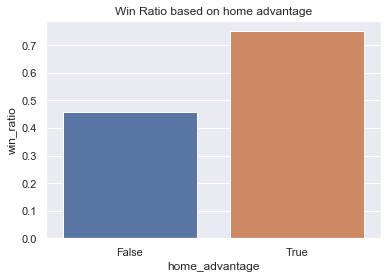

In [73]:
wr_plt = sns.barplot(x="home_advantage", y="win_ratio", data = wins_ratio_df)
wr_plt.set_title("Win Ratio based on home advantage")

In [74]:
tmp1.head()

,neutral_location,variable,value
0,False,goals_scored_pm,2.470588
1,False,goals_scored_pm,2.500000
2,False,goals_scored_pm,2.653846
3,False,goals_scored_pm,2.340000
4,False,goals_scored_pm,1.588235


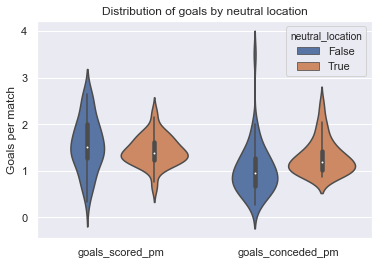

In [75]:
goal_plt = sns.violinplot(x='variable',y='value',hue='neutral_location',data=tmp1)
goal_plt.set_title('Distribution of goals by neutral location')
goal_plt.set_xlabel('')
_= goal_plt.set_ylabel('Goals per match')